In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows',100)

In [107]:
df = pd.read_csv("listings.csv.gz")

In [108]:
print(df.shape)

(9550, 79)


In [109]:
print(df.head(5))

      id                         listing_url       scrape_id last_scraped  \
0  29059  https://www.airbnb.com/rooms/29059  20250918041652   2025-09-18   
1  29061  https://www.airbnb.com/rooms/29061  20250918041652   2025-09-18   
2  38118  https://www.airbnb.com/rooms/38118  20250918041652   2025-09-18   
3  50479  https://www.airbnb.com/rooms/50479  20250918041652   2025-09-18   
4  66247  https://www.airbnb.com/rooms/66247  20250918041652   2025-09-18   

        source                                               name  \
0  city scrape                       Lovely studio Quartier Latin   
1  city scrape                 Maison historique - Quartier Latin   
2  city scrape  Beautiful room  with a balcony in front of a parc   
3  city scrape                                     L'Arcade Douce   
4  city scrape  Modern Loft Next To Basilica Notre Dame In Old...   

                                         description  \
0  CITQ 267153<br />Lovely studio with 1 closed r...   
1  Lovely 

In [110]:
print((df.isnull().sum() / len(df) *100).sort_values(ascending=False).head(20))

neighbourhood_group_cleansed    100.000000
calendar_updated                100.000000
host_neighbourhood               64.115183
neighbourhood                    58.450262
neighborhood_overview            58.450262
license                          49.769634
host_about                       47.958115
host_location                    25.319372
last_review                      20.052356
first_review                     20.052356
review_scores_location           20.052356
review_scores_accuracy           20.052356
reviews_per_month                20.052356
review_scores_value              20.052356
review_scores_cleanliness        20.052356
review_scores_communication      20.052356
review_scores_checkin            20.052356
review_scores_rating             20.052356
beds                             11.214660
bathrooms                        11.214660
dtype: float64


In [111]:
close_to_check = ['neighbourhood', 'neighborhood_overview','license', 'host_about' , 'host_location']
for col in close_to_check:
    print(f"\n\n--- {col} ---")
    print(df[col].head(10))



--- neighbourhood ---
0    Neighborhood highlights
1    Neighborhood highlights
2                        NaN
3    Neighborhood highlights
4    Neighborhood highlights
5    Neighborhood highlights
6                        NaN
7    Neighborhood highlights
8                        NaN
9                        NaN
Name: neighbourhood, dtype: object


--- neighborhood_overview ---
0    CENTRAL is the watchword: everything is close....
1    The neighborhood you'll discover is called the...
2                                                  NaN
3    Our area is full of life (but our street is qu...
4    A perfect gateway from which to explore the ri...
5    Within a 2-minute walk, you can access Sherbro...
6                                                  NaN
7    Pointe Saint-Charles is an historical resident...
8                                                  NaN
9                                                  NaN
Name: neighborhood_overview, dtype: object


--- license ---
0    Que

In [112]:
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url',
 'host_neighbourhood','description', 'host_name', 'picture_url', 'host_thumbnail_url',
 'first_review', 'last_review', 'calendar_last_scraped',
 'availability_30', 'availability_60', 'availability_90', 'availability_365',
 'minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights',
 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
 'last_scraped','source','name', 'host_since','host_picture_url', 'host_verifications',
 'host_has_profile_pic','has_availability','instant_bookable',
 'neighbourhood', 'neighborhood_overview','license', 'host_about' ,
 'host_location','calendar_updated','neighbourhood_group_cleansed']
df.drop(columns= cols_to_drop, inplace=True)

In [113]:
print((df.isnull().sum() / len(df) *100).sort_values(ascending=False).head(80).reset_index())

                                           index          0
0                          review_scores_checkin  20.052356
1                      review_scores_cleanliness  20.052356
2                         review_scores_accuracy  20.052356
3                           review_scores_rating  20.052356
4                              reviews_per_month  20.052356
5                            review_scores_value  20.052356
6                         review_scores_location  20.052356
7                    review_scores_communication  20.052356
8                                      bathrooms  11.214660
9                                           beds  11.214660
10                                         price  11.172775
11                       estimated_revenue_l365d  11.172775
12                            host_response_rate  10.994764
13                            host_response_time  10.994764
14                          host_acceptance_rate   8.743455
15                             host_is_s

In [114]:
num_cols = df.select_dtypes(include=['Int64','Float64']).columns
for col in num_cols:
    df[col]= df[col].fillna(df[col].median())

In [115]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols :
    df[col] = df[col].fillna('Unknown')

df['price'] = df['price'].replace('Unknown',None)

In [116]:
print((df.isna().sum()/len(df)*100).sort_values(ascending=False).reset_index())

                                           index          0
0                                          price  11.172775
1                             host_response_time   0.000000
2                           host_acceptance_rate   0.000000
3                             host_response_rate   0.000000
4                            host_listings_count   0.000000
5                      host_total_listings_count   0.000000
6                         host_identity_verified   0.000000
7                              host_is_superhost   0.000000
8                         neighbourhood_cleansed   0.000000
9                                       latitude   0.000000
10                                 property_type   0.000000
11                                     longitude   0.000000
12                                  accommodates   0.000000
13                                     bathrooms   0.000000
14                                bathrooms_text   0.000000
15                                     r

In [117]:
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price'],
      dtype='object')


99th percentile of price: 924.2400000000052
Original shape: (9550, 40)
Shape after price trimming: (8398, 40)


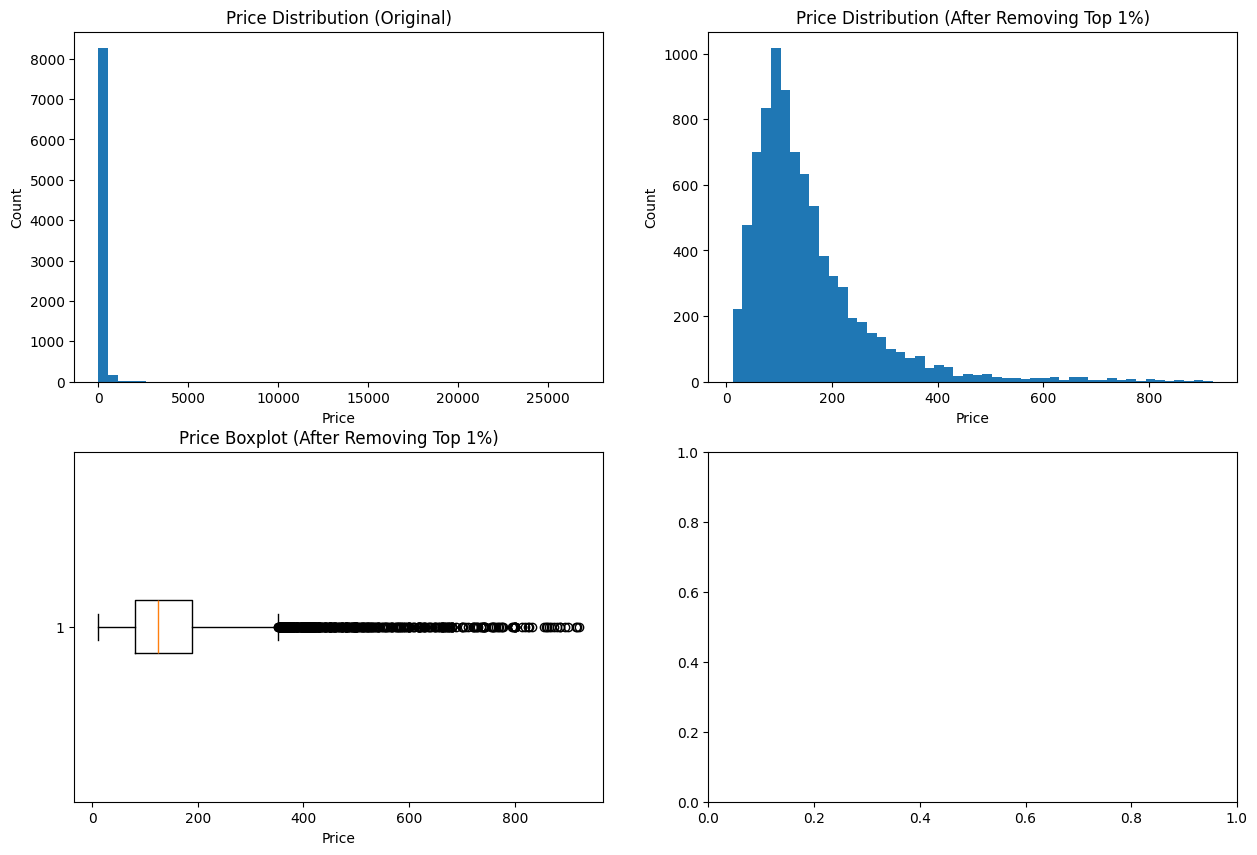

In [118]:
df['price'] = df['price'].str.replace('$','',regex=False).str.replace(',','').astype(float)
price_99 = df['price'].quantile(0.99)
print("99th percentile of price:", price_99)
df_clean = df[df['price'] <= price_99].copy()
print("Original shape:", df.shape)
print("Shape after price trimming:", df_clean.shape)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['price'], bins=50)
axes[0, 0].set_title("Price Distribution (Original)")
axes[0, 0].set_xlabel("Price")
axes[0, 0].set_ylabel("Count")

axes[0, 1].hist(df_clean['price'], bins=50)
axes[0, 1].set_title("Price Distribution (After Removing Top 1%)")
axes[0, 1].set_xlabel("Price")
axes[0, 1].set_ylabel("Count")

axes[1, 0].boxplot(df_clean['price'], vert=False)
axes[1, 0].set_title("Price Boxplot (After Removing Top 1%)")
axes[1, 0].set_xlabel("Price")
plt.show()

In [119]:
cols_to_encode = [
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
    'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price'
]

In [120]:
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

x= df.drop(columns=['price'])
y= df['price']


In [121]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split( x , y ,test_size=0.2 , random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

model = RandomForestRegressor(n_estimators=200 , random_state=42 , n_jobs=-1)
model.fit(X_train , Y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test ,y_pred)
mse = mean_squared_error(Y_test , y_pred)
r2 = r2_score(Y_test , y_pred)
rmse = mse ** 0.5

print("MAE:",mae)
print("RMSE:",rmse)
print('r2_score',r2 )
print("Model score:",model.score(X_test , Y_test))

MAE: 77.8139214659686
RMSE: 134.32082065044654
r2_score 0.6961052908787256
Model score: 0.6961052908787256


In [122]:
import matplotlib.pyplot as plt 
import seaborn as sns

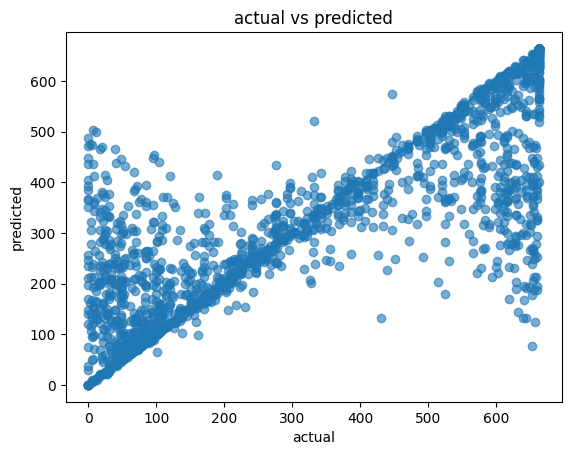

In [123]:
plt.scatter(Y_test , y_pred , alpha=0.6)
plt.plot([Y_test.min() , y_pred.max()],
         [Y_test.min() , Y_test.max()],'--')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")
plt.show()

Text(0.5, 1.0, 'residuals plot')

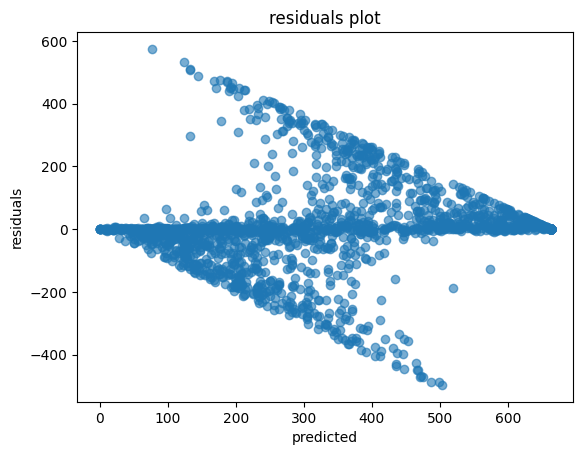

In [124]:
residuals = Y_test - y_pred
plt.scatter(y_pred ,residuals , alpha=0.6)
plt.hlines(0,y_pred.min(),y_pred.max(),
linestyles='--')
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.title('residuals plot')

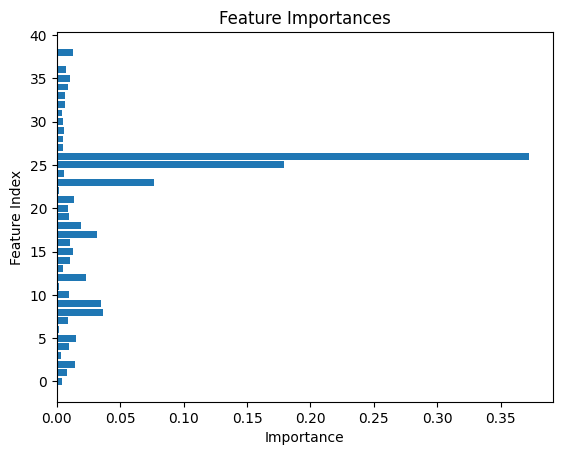

In [125]:
importances = model.feature_importances_
plt.barh(range(len(importances)),importances)
plt.xlabel("Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importances")
plt.show()